## LangGraph Introduction

### What is LangGraph?

<small>LangGraph is a flexible framework for building generative AI applications, from chatbots to complex models, built on the LangChain library.</small>

<small>Each node represents an entity or function connected by edges, organized in a directed acyclic graph (DAG) representing the application's workflow.</small>

### Features:

- <small>**Controllability**: Control generative models' behavior with tools for building, training, deploying, and monitoring models in production using LangGraph Studio.</small>
- <small>**State Management**: Manage inputs and outputs of each node with state representation.</small>
- <small>**Workflow Management**: Tools for building and operating generative models, and monitoring them in production using LangGraph Studio.</small>

### LangGraph Studio

<small>LangGraph Studio is a web interface for managing and monitoring generative models in production, designed to be flexible and extensible for various generative AI applications, built on the LangChain library.</small>

#### Import Libraries

In [71]:
import os
from typing import TypedDict, List
from langgraph.graph import StateGraph, END
from langchain_openai import ChatOpenAI
from langchain_core.prompts.prompt import PromptTemplate 
from langchain_core.messages.human import HumanMessage
from IPython.display import Image, display

from dotenv import load_dotenv

#### Set Environment Variables

In [72]:
# Load Environment Variables
load_dotenv()

# Set OpenAI API Key
try:
    os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
except KeyError:
    raise ValueError("OPENAI_API_KEY not found in environment variables.")

#### Creating a Text Processing Pipeline

<small> Define a graph state to store the input text and initialize the LMM to process the text.</small>


In [73]:
class State(TypedDict):
    text: str
    classification: str
    entities: List[str]
    summary: str

try:
    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
except Exception as e:
    print(f"An error occurred: {e}")


#### Define the Node functions

In [84]:
def classification_node(state: State):
  '''Classify the input text into a category: News, Blogs, Research, or Others'''
  prompt = PromptTemplate(
    input_variables=["text"],
    template="Classify the following text into a category: News, Blogs, Research, or Others. \n\nText: {text} \n\nCategory:"
  )
  message=HumanMessage(content=prompt.format(text=state["text"]))
  classification=llm.invoke([message]).content.strip()
  return {"classification": classification}

def entity_extraction_node(state: State):
  '''Extract entities(Person, Organization, Location) from the input text'''
  prompt = PromptTemplate(
    input_variables=["text"],
    template="Extract entities(Person, Organization, Location)from the following text. Leave it blank if there is no entity. \n\nText: {text} \n\nEntities:"
  )
  message=HumanMessage(content=prompt.format(text=state["text"]))
  extraction_entities=llm.invoke([message]).content.strip().split(", ")
  return {"entities": extraction_entities}
  
def summarization_node(state: State):
  '''Summarize the input text in one short sentence'''
  prompt=PromptTemplate(
    input_variables=["text"],
    template="Summarize the following text in one short sentence. \n\nText: {text} \n\nSummary:"
  )
  message=HumanMessage(content=prompt.format(text=state["text"]))
  summary=llm.invoke([message]).content.strip()
  return {"summary": summary}

#### Create the Graph and Build the workflow

In [66]:
workflow = StateGraph(State)

# Add Nodes to the Graph
workflow.add_node("classification_node", classification_node)
workflow.add_node("entity_extraction_node", entity_extraction_node)
workflow.add_node("summarization_node", summarization_node)

# Define the Workflow
workflow.set_entry_point("classification_node")
workflow.add_edge("classification_node", "entity_extraction_node")
workflow.add_edge("entity_extraction_node", "summarization_node")
workflow.add_edge("summarization_node", END)

# Compile the Graph
app = workflow.compile()


#### Visualize the Graph



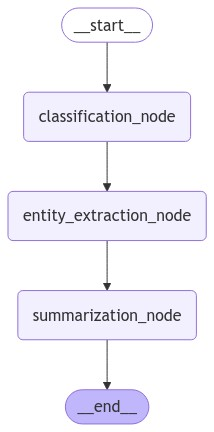

In [74]:
try:
    graph_image = app.get_graph(xray=True).draw_mermaid_png()
    display(Image(graph_image))
except Exception as e:
    print(f"Failed to display the graph: {e}")


#### Testing the Workflow

In [85]:
sample_text = "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Compared to other LLM frameworks, it offers these core benefits: cycles, controllability, and persistence. LangGraph allows you to define flows that involve cycles, essential for most agentic architectures, differentiating it from DAG-based solutions. As a very low-level framework, it provides fine-grained control over both the flow and state of your application, crucial for creating reliable agents. Additionally, LangGraph includes built-in persistence, enabling advanced human-in-the-loop and memory features."

state_input = {"text": sample_text}
result = app.invoke(state_input)

print("Classification: ", result["classification"])
print("\nEntities: ", result["entities"])
print("\nSummary: ", result["summary"])
print("\nIndividual Entity:")
for entity in result["entities"]:
    print(entity)

Classification:  Research

Entities:  ['- **Organization**: LangGraph\n- **Location**: None\n- **Person**: None']

Summary:  LangGraph is a low-level library for developing stateful, multi-actor applications with LLMs, offering unique features like cycles, controllability, and built-in persistence for enhanced agent workflows.

Individual Entity:
- **Organization**: LangGraph
- **Location**: None
- **Person**: None


#### Conclusion
<small>LangGraph is a powerful tool for building generative AI applications, from chatbots to complex models, built on the LangChain library.</small>

<small>Each node represents an entity or function connected by edges, organized in a directed acyclic graph (DAG) representing the application's workflow.</small>

<small>In this tutorial, we have learned how to build a text processing pipeline using LangGraph and how to visualize and test the pipeline.</small>

